In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load dataset
df = pd.read_csv('advertising.csv')

In [2]:
# Simple linear regression

X = df[['TV']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

Coefficient: 0.046529733705443346
Intercept: 7.119638430592953


<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Maduranga\AppData\Local\Temp\ipykernel_1744\3758333907.py:2: SyntaxWarning: invalid escape sequence '\F'
  print("\First 5 Predictions:")


\First 5 Predictions:
Predicted: 14.72, Actual: 16.90
Predicted: 16.21, Actual: 22.40
Predicted: 20.75, Actual: 21.40
Predicted: 7.66, Actual: 7.30
Predicted: 17.37, Actual: 24.70


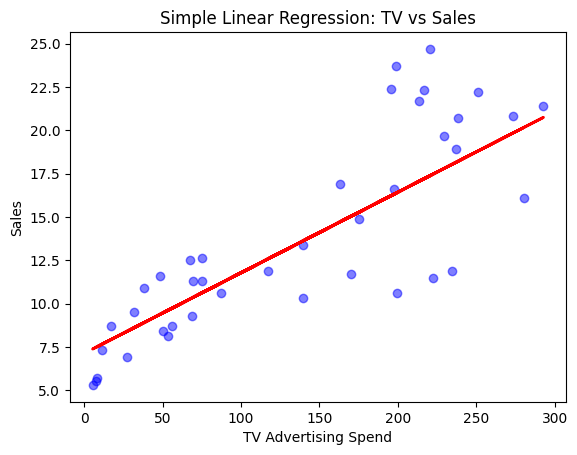

In [3]:
y_pred = model.predict(X_test)
print("\First 5 Predictions:")
for i in range(5):
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test.values[i]:.2f}")

# plot
plt.scatter(X_test, y_test, color='blue', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('Simple Linear Regression: TV vs Sales')
plt.show()

In [4]:
# Metrix
print(f"\nR-squared: {model.score(X_test, y_test):.4f}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.4f}")


R-squared: 0.6767
MAE: 2.4444
MSE: 10.2047
RMSE: 3.1945


In [5]:
# Multiple linear regression
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit model
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

print("Intercept:", model_multi.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model_multi.coef_):
    print(f"{feature}: {coef}")

Intercept: 2.979067338122629
Coefficients:
TV: 0.044729517468716326
radio: 0.18919505423437652
newspaper: 0.0027611143413671935


In [6]:
# Prediction
y_pred_multi = model_multi.predict(X_test)
print("\First 5 Predictions (Multiple Regression):")
for i in range(5):
    print(f"Predicted: {y_pred_multi[i]:.2f}, Actual: {y_test.values[i]:.2f}")

\First 5 Predictions (Multiple Regression):
Predicted: 16.41, Actual: 16.90
Predicted: 20.89, Actual: 22.40
Predicted: 21.55, Actual: 21.40
Predicted: 10.61, Actual: 7.30
Predicted: 22.11, Actual: 24.70


<>:3: SyntaxWarning: invalid escape sequence '\F'
<>:3: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Maduranga\AppData\Local\Temp\ipykernel_1744\1676306187.py:3: SyntaxWarning: invalid escape sequence '\F'
  print("\First 5 Predictions (Multiple Regression):")


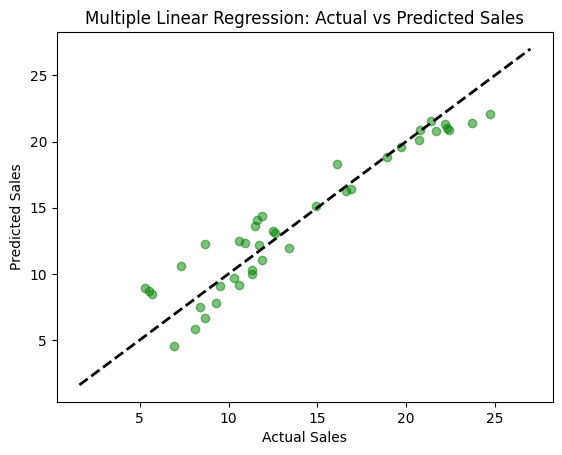

In [7]:
# plot

plt.scatter(y_test, y_pred_multi, color='green', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Multiple Linear Regression: Actual vs Predicted Sales')
plt.show()

In [8]:
# Metrics
print(f"\nR-squared: {model_multi.score(X_test, y_test):.4f}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred_multi):.4f}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred_multi):.4f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_multi)):.4f}")


R-squared: 0.8994
MAE: 1.4608
MSE: 3.1741
RMSE: 1.7816
